## Материалы
- [Презентация](https://disk.yandex.ru/i/bhr4EY39JuiLCw)
- [Дашборд](https://public.tableau.com/app/profile/ksenia6674/viz/_16645671362710/first#1)


# Оглавление

1. [Знакомство с данными](#firstview)
2. [Предобработка данных](#pre_processing)
3. [Исследовательский анализ данных и формулирование гипотез](#analysis)
 - 3.1. [Сегментация покупателей на основе истории их покупок](#segments)
 - 3.2 [Кластеризация](#clusters)
4. [Презентация](#presentation)
5. [Выводы и рекомендации](#sumup)

# Выявление профилей потребления покупателей интернет-магазина товаров для дома и быта «Пока все ещё тут»

### Основная цель: 
подготовка персональных предложений для клиентов и подготовка рекомендаций для менеджера на основании проведенного анализа.

### Заказчик: 
менеджер продукта, который отвечает за пользовательский опыт.

### Цель исследования:

Сегментировать покупателей по профилю потребления:
- Провести исследовательский анализ данных
- Сегментировать покупателей на основе истории их покупок
- Сформулировать и проверить статистические гипотезы

### Ход исследования

Перед анализом данных понадобится обзор и предобработка данных. Необходимо проверить данные на ошибки и оценить их влияние на исследование.

В итоге мы сформулируем основные выводы и предложим рекомендации для подготовки персональных предложений для клиентов.

Таким образом, исследование пройдёт в 5 этапов:

1. Знакомство с данными
2. Предобработка данных
3. Исследовательский анализ данных и формулирование гипотез
 - 3.1. Сегментация покупателей на основе истории их покупок
 - 3.2 Кластеризация
4. Презентация
5. Выводы и рекомендации


# 1. Знакомство с данными
<a name="firstview"></a>

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
import datetime 
import warnings

In [249]:
warnings.filterwarnings("ignore")

In [250]:
# изучим данные
data = pd.read_csv('ecommerce_dataset.csv')
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [251]:
data.info() # выведем сводную информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [252]:
#проверим на неявные дубликаты
new = data[data.duplicated(subset=['date', 'order_id', 'product', 'quantity', 'price'])]
display(new) # 1 позиция


# удалим их из таблицы
data = data.drop(new.index, axis = 0)

,date,customer_id,order_id,product,quantity,price
4298,2019060210,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0


In [253]:
# проверим данные на дубликаты
data.duplicated().mean()

0.0

## Вывод
В данных 6737 строк и 6 столбцов, отсутствуют явные дубликаты и пропущенные значения. Удален один неявный дубликат. Необходимо заменить тип столбца с датой на datetime, добавить новые колонки для месяца, дня, времени и года, а также проверить данные на аномалии и выбивающиеся значения.

# 2. Предобработка данных
<a name="pre_processing"></a>

In [254]:
# изменим тип данных для столбца с датой и добавим новые колонки для месяца, дня, времени и года

data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data['year'] = data['date'].dt.year
data['dt'] = data['date'].dt.date
data['month_year'] = data['date'].dt.to_period('M')
data['day'] = data['date'].dt.day
data['time'] = data['date'].dt.time
data.head()

,date,customer_id,order_id,product,quantity,price,year,dt,month_year,day,time
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018,2018-10-01,2018-10,1,00:00:00
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018,2018-10-01,2018-10,1,00:00:00
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018,2018-10-01,2018-10,1,00:00:00
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018,2018-10-01,2018-10,1,00:00:00
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018,2018-10-01,2018-10,1,00:00:00


In [255]:
# добавим колонку с общей суммой строки
data['total'] = data['price']*data['quantity']

In [256]:
# проверим, есть ли выбивающиеся значения в столбцах
data['date'].describe(datetime_is_numeric=True)

count                             6736
mean     2019-04-11 20:08:18.634204416
min                2018-10-01 00:00:00
25%                2019-02-04 13:00:00
50%                2019-05-02 16:00:00
75%                2019-06-10 22:00:00
max                2019-10-31 16:00:00
Name: date, dtype: object

В столбце дата представлены данные за период с 00:00 1 октября 2018 года по 16:00 31 октября 2019 года.

In [257]:
display(data['customer_id'].describe())
data['order_id'].nunique()

count                                     6736
unique                                    2450
top       1d6c8c1f-a799-4418-9af2-1ded47d7a85c
freq                                       888
Name: customer_id, dtype: object

2784

В таблице представлены данные о 2784 заказах, сделанных 2450 покупателями, из которых 1 купил больше всего товарных позиций. Посмотрим, когда и на какую сумму.

In [258]:
display(data.query('customer_id == "1d6c8c1f-a799-4418-9af2-1ded47d7a85c"').groupby(['month_year', 'day']).agg({'total':'sum'}))
data.query('customer_id == "1d6c8c1f-a799-4418-9af2-1ded47d7a85c"')['total'].sum()


total
month_year day         
2019-05    31    3060.0
2019-06    1     4590.0
           2    10710.0
           3     7650.0
           4     7650.0
           5     6120.0
           6     3060.0
           7     6120.0
           8     1530.0
           9     6120.0
           10   10710.0
           11    9180.0
           12    4590.0
           13    7650.0
           14    6120.0
           15    6120.0
           16    3060.0
           17    1530.0
           18    3060.0
           19    1530.0
           21    1530.0
           22    3060.0

114750.0

Клиент оформил заказ за период с 31 мая по 22 июня 2019 года на общую сумму 114750 рублей. После этого больше заказов он не делал.

In [259]:
# проверим столбец на выбивающиеся значения
data['product'].describe()

count                                           6736
unique                                          2343
top       Рассада Кабачка сорт Зебра кассета 6 шт E6
freq                                              79
Name: product, dtype: object

В таблице представлено 2343 уникальные товарные позиции.

In [260]:
# проверим столбец на выбивающиеся значения
data['quantity'].describe()

count    6736.000000
mean        2.501781
std        15.267601
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

Выделяется заказ, содержащий 1000 позиций одного товара. Проверим, похоже ли это на выброс.

In [261]:
display(data.query('quantity == 1000'))

# проверим, заказывал ли этот покупатель что-то еще
data.query('customer_id == "312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6"')

,date,customer_id,order_id,product,quantity,price,year,dt,month_year,day,time,total
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019,2019-06-18,2019-06,18,15:00:00,675000.0


,date,customer_id,order_id,product,quantity,price,year,dt,month_year,day,time,total
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019,2019-06-18,2019-06,18,15:00:00,675000.0


Покупатель сделал единственный большой заказ и больше не возвращался. Стоит удалить эту строку как потенциально влияющую на разброс данных. 

In [262]:
data = data.drop(labels = [5456], axis = 0)
data['quantity'].describe()

count    6735.000000
mean        2.353675
std         9.238737
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       334.000000
Name: quantity, dtype: float64

In [263]:
# проверим столбец на выбивающиеся значения
data['price'].describe()

count     6735.000000
mean       462.037713
std        871.415133
min          9.000000
25%        101.000000
50%        135.000000
75%        397.500000
max      14917.000000
Name: price, dtype: float64

Аномалий в поле price нет, но можно посмотреть, много ли клиентов делали заказ на дорогие позиции.

##  Вывод
Мы заменинили тип столбца с датой на datetime, добавили новые колонки для месяца, дня, времени, года и с общей суммой строки, а также проверили данные на аномалии и выбивающиеся значения. Мы обнаружили, что:
- В столбце дата представлены данные за период с 00:00 1 октября 2018 года по 16:00 31 октября 2019 года
- В таблице представлены данные о 2784 заказах, сделанных 2451 покупателем
- В таблице представлено 2343 уникальные товарные позиции
- Удалили строку с выбивающимся значением (количество позиций в заказе 1000 штук)

Проанализируем обработанные данные.

# 3. Исследовательский анализ данных и формулирование гипотез
<a name="analysis"></a>

На данный момент мы сформулировали следующие гипотезы, которые проверим в ходе исследования:
- Клиенты, которые покупают много товарных позиций, и клиенты с высоким средним чеком, это одни и те же люди, и поощрять их нужно одинаковым способом.
- 2784 заказа сделали 2450 покупателей, те много заказов сделало малое количество клиентов. Если таких клиентов отдельно выделить и поощрять, то количество заказов с их стороны увеличится.
- Есть зависимость между средним чеком и наличием повторных заказов у покапателей. Увеличение среднего чека может привести к увеличению или уменьшению частоты заказов или наоборот.


Выделим категории товаров.

In [264]:
def product_category(value):
    """
     - удаляем запятые
     - удаляем тире
    """
    new_value = value.replace(',', '').replace('-', '')
    return new_value

data['category'] = data['product'].apply(product_category)

data.head()



,date,customer_id,order_id,product,quantity,price,year,dt,month_year,day,time,total,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018,2018-10-01,2018-10,1,00:00:00,142.0,Комнатное растение в горшке Алое Вера d12 h30
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018,2018-10-01,2018-10,1,00:00:00,194.0,Комнатное растение в горшке Кофе Арабика d12 h25
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018,2018-10-01,2018-10,1,00:00:00,112.0,Радермахера d12 см h20 см
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018,2018-10-01,2018-10,1,00:00:00,179.0,Хризолидокарпус Лутесценс d9 см
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018,2018-10-01,2018-10,1,00:00:00,112.0,Циперус Зумула d12 см h25 см


In [265]:
def del_num(text):
    """
     - удаляем цифры
    """
    rtrn = ''
    for i in text:
        if not i.isdigit():
            rtrn += i
    return rtrn
data['category'] = data['category'].apply(del_num)
data.head()

,date,customer_id,order_id,product,quantity,price,year,dt,month_year,day,time,total,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018,2018-10-01,2018-10,1,00:00:00,142.0,Комнатное растение в горшке Алое Вера d h
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018,2018-10-01,2018-10,1,00:00:00,194.0,Комнатное растение в горшке Кофе Арабика d h
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018,2018-10-01,2018-10,1,00:00:00,112.0,Радермахера d см h см
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018,2018-10-01,2018-10,1,00:00:00,179.0,Хризолидокарпус Лутесценс d см
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018,2018-10-01,2018-10,1,00:00:00,112.0,Циперус Зумула d см h см


In [266]:
# разделяем строку по пробелам 
# оставляем первые два слова

words = data['category'].str.split(expand=True)
words['new'] = words[0] + ' ' + words[1]

# присоединим столбец с первыми двумя словами продукта в таблицу data
data = data.join(words['new'])
data = data.rename(
columns={
'new': 'product_category',}
)
data = data.drop(columns='category')



In [267]:
# делаем текст строчным

data['product_category'] = data['product_category'].str.lower()

Составим словарь для выделения категорий товаров.

In [268]:
diction = (
    {
'Растения': ['растение', 'h', 'd', 'рассада', 'хризолидокарпус', 'герань', 'мимоза', 'пеларгония', 'каланхое', 'Растения'], 
'Декоративные/искусственные композиции': ['муляж', 'искусств', 'декоратив'],
'Товары для дома': ['подушка', 'скатерть', 'полотенце', 'ерш', 'коврик', 'ёрш', 'сушилка', 'таз', 'вешалк', 'плед', 'ковер', 
                    'простын', 'плечики', 'полотенце', 'веник', 'ведро', 'перчатки', 'ролик', 'сетка', 'щетка', 'прищеп', 
                    'корзина', 'плед', 'эмал', 'алюм', 'швабра', 'гладил', 'оцинк', 'штора', 'светильник', 'чехол', 'крючок',
                    'подкладка', 'дозатор', 'вешал', 'ковр', 'салфет', 'кофр', 'ковёр', 'матрас', 'шнур', 'урна', 'сметка', 
                    'халат', 'держатель', 'пробка', 'покрывало', 'постел', 'одеял', 'мыльн', 'махров', 'вантуз', 'рамка', 
                    'этажерка', 'полк', 'ключ', 'карниз', 'капрон', 'светильник', 'кашпо', 'фиксат', 'наволочка', 'стеллаж', 
                    'ванна', 'ваза', 'ручка', 'решетка', 'тряпка', 'щётка', 'совок', 'постел', 'шпингалет', 'подрукавник',
                    'сиденье', 'сменн', 'подставка', 'скребок', 'завертка', 'кольца', 'комплект для', 'штанга для', 'отжим для', 
                    'шпагат', 'складной'], 
'Кухня': ['круж', 'тарелка', 'вилка', 'ложка', 'нож', 'крышка', 'сковорода', 'фужер', 'чайник', 'стеклянная', 'противень', 
          'салатник', 'чай', 'масленка', 'рыбочистка', 'терка', 'измельчитель', 'губка', 'ковш', 'бокал', 'кисточка', 'кондит',
          'форм', 'миска', 'пресс', 'стакан', 'кувшин', 'термос', 'доска', 'штопор', 'блюдце', 'бульонница', 'просеиватель',
          'кастрюля', 'толкушка', 'хлеб', 'орех', 'скалка', 'торт', 'посуд', 'сахар', 'лопатка', 'кух', 'картоф', 'столов', 
          'венчик', 'рукав', 'половник', 'пламен', 'зажигалка'], 
'Инструменты':  ['свер', 'крепеж', 'пена', 'насадка', 'стремянка', 'сварка', 'инструмент', 'стяжк', 'пружин', 'линейка', 'бензин',
                 'петля', 'шило', 'прецизион', 'угольник', 'штангенциркуль', 'уголок', 'основание'],
'Хранение и перевозка': ['контейнер', 'коробка', 'ящик', 'лоток', 'сумка', 'тележка', 'емкость', 'бак', 'пакет', 'мешок', 'комод', 
                         'бидон', 'корзин', 'пикник'],
'Бытовая техника': ['утюг', 'весы', 'миксер', 'фен', 'пылесос', 'окномойка', 'соковарка', 'соковыжималка', 'кипятильник'],
'Средства для дома и бытовая химия': ['жир', 'средств', 'стирал', 'крем', 'мыло', 'паста', 'гипоаллер', 'маска', 'концентр', 
                                      'отбеливатель']

    }
)


Удалим лишние знаки.

In [269]:
def product(row):
    if 'h' in row['product']:
        return 'Растения'
    elif 'd' in row['product']:
        return 'Растения'
    else:
        return row['product_category']

data['product_category'] = data.apply(product, axis=1)

Выделим категории.

In [270]:
def category(row):
    for key, values in diction.items():
        for value in values:
            if value in row['product_category']:
                return key
    return 'Растения'

data['product_category'] = data.apply(category, axis=1)
data['product_category'].unique()


array(['Растения', 'Товары для дома', 'Кухня', 'Хранение и перевозка',
       'Декоративные/искусственные композиции', 'Инструменты',
       'Средства для дома и бытовая химия', 'Бытовая техника'],
      dtype=object)

Посмотрим на распределение по товарным категориям.

In [271]:
by_category = (
    data.groupby('product_category')
    .agg({'customer_id':'nunique', 'order_id':'nunique','quantity':'sum', 'total':'sum'})
    .sort_values(by='total', ascending=False).reset_index()
)
by_category


,product_category,customer_id,order_id,quantity,total
0,Товары для дома,879,993,4423,1509212.0
1,Растения,936,1065,6107,1390799.0
2,Хранение и перевозка,325,358,724,796509.0
3,Кухня,201,211,1141,217864.0
4,Декоративные/искусственные композиции,165,174,2361,121991.0
5,Инструменты,53,59,1019,121604.0
6,Бытовая техника,17,17,20,11984.0
7,Средства для дома и бытовая химия,21,20,57,6130.0


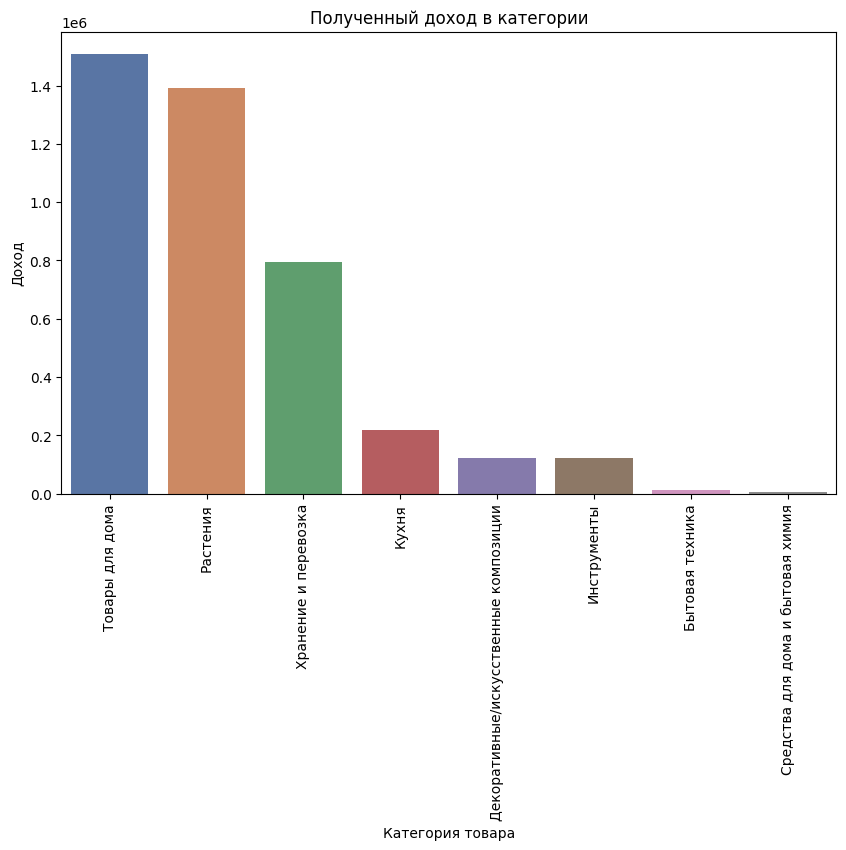

In [272]:
# построим график полученного дохода
plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(x='product_category', y='total', data=by_category)
plt.xticks(rotation=90)
ax.set_title('Полученный доход в категории') 
ax.set_xlabel('Категория товара')
ax.set_ylabel('Доход') 
plt.show()

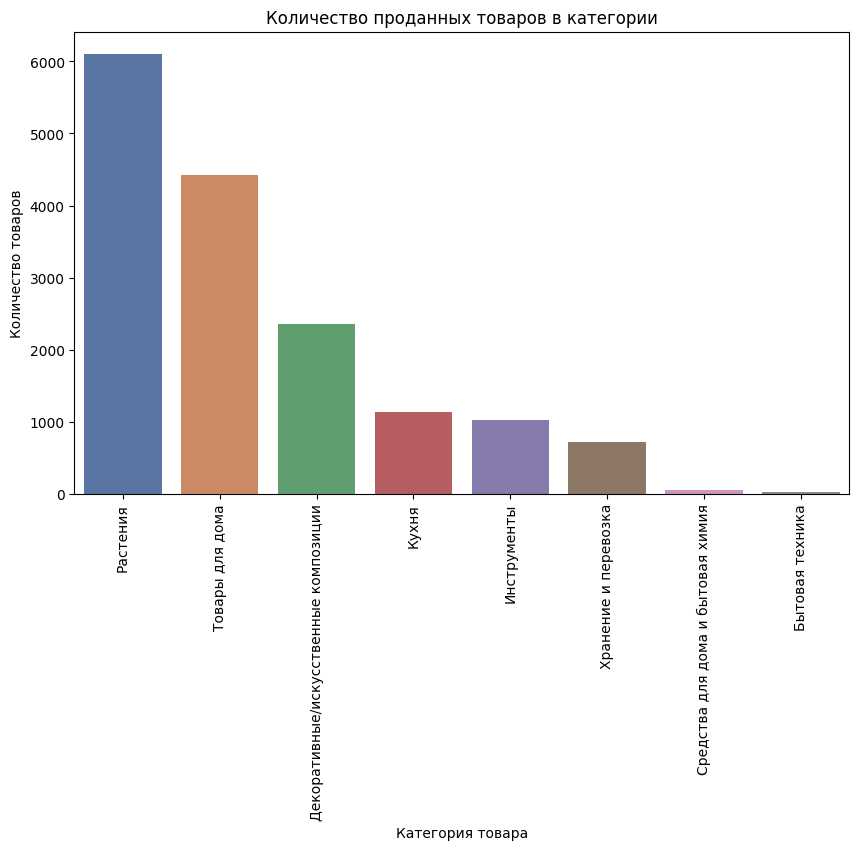

In [273]:
# построим график количества проданных товаров
quant = by_category.sort_values(by='quantity', ascending=False)
plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(x='product_category', y='quantity', data=quant)
plt.xticks(rotation=90)
ax.set_title('Количество проданных товаров в категории') 
ax.set_xlabel('Категория товара')
ax.set_ylabel('Количество товаров') 
plt.show()

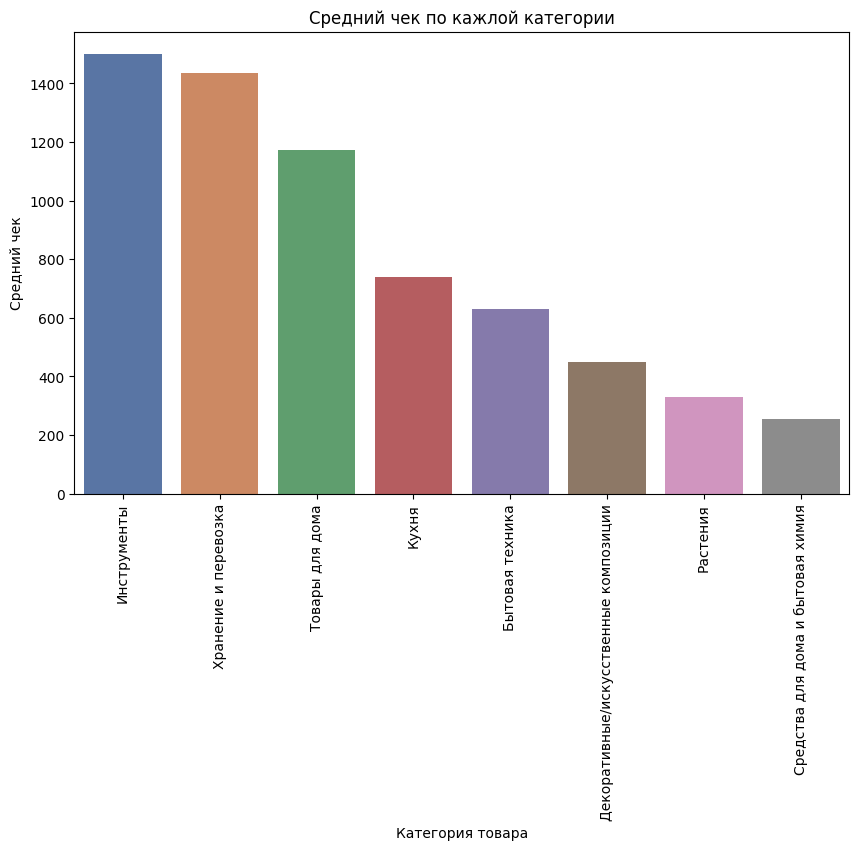

In [274]:
# посомотрим на распределение по среднему чеку
by_category_mean = (
    data.groupby(['product_category'])
    .agg({'customer_id':'nunique', 'order_id':'nunique','product':'nunique', 'quantity':'sum', 'total':'mean'})
    .sort_values(by='total', ascending=False).reset_index()
)

plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(x='product_category', y='total', data=by_category_mean)
plt.xticks(rotation=90)
ax.set_title('Средний чек по кажлой категории') 
ax.set_xlabel('Категория товара')
ax.set_ylabel('Средний чек') 
plt.show()

В товарных категориях по общей сумме покупок лидируют "Растения" и "Товары для дома", причем растений было куплено больше по количеству, а сумма покупок выше для товаров для дома. Однако средний чек выше в категориях "Инструменты" и "Хранение и перевозка".


Посмотрим, какие категории были популярны в разных месяцах.

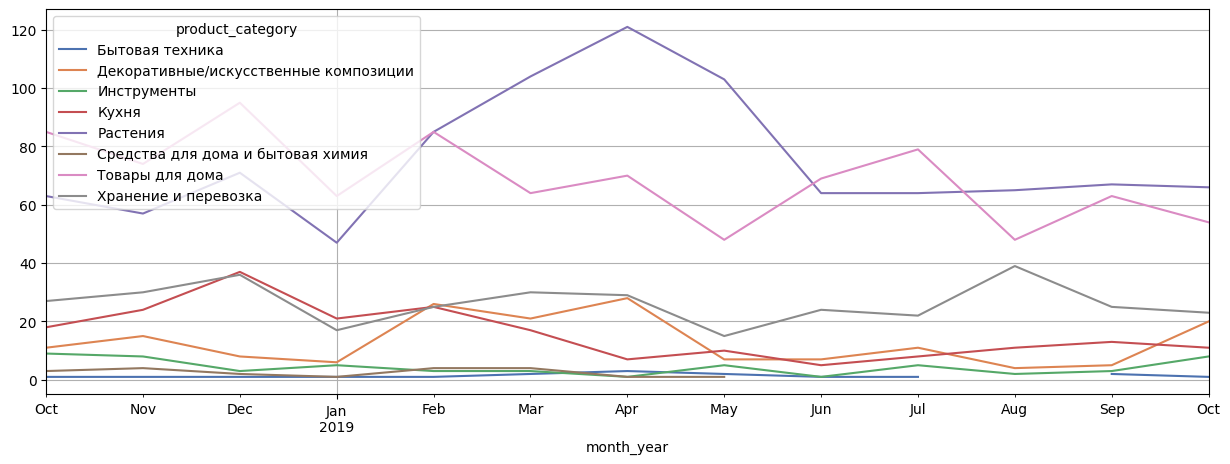

In [275]:
#  посмотрим, какие категории были популярны в разных месяцах
data.pivot_table(
    index='month_year',  # месяцы покупок
    columns='product_category',  # категории товаров
    values='customer_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

Чаще всего в самых популярных категориях "Растения" и "Товары для дома" покупали апреле 2019 и декабре 2018 года соответственно.

## 3.1 Сегментация покупателей на основе истории их покупок
<a name="segments"></a>

Посмотрим на распределение покупок по времени.

In [276]:
# выделим категории в зависимости от времени суток

night_time = datetime.datetime(2019, 1, 1, 0, 0)
morning_time = datetime.datetime(2019, 1, 1, 8, 0)
day_time = datetime.datetime(2019, 1, 1, 12, 0)
evening_time = datetime.datetime(2019, 1, 1, 18, 0)

def period (time):
    if time.time() > night_time.time() and time.time() <= morning_time.time():
        return 'night'
    elif time.time() > morning_time.time() and time.time() <= day_time.time():
        return 'morning'
    elif time.time() > day_time.time() and time.time() <= evening_time.time():
        return 'day'
    else:
        return 'evening'
data['period'] = data['date'].apply(period)
data.head()

,date,customer_id,order_id,product,quantity,price,year,dt,month_year,day,time,total,product_category,period
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018,2018-10-01,2018-10,1,00:00:00,142.0,Растения,evening
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018,2018-10-01,2018-10,1,00:00:00,194.0,Растения,evening
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018,2018-10-01,2018-10,1,00:00:00,112.0,Растения,evening
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018,2018-10-01,2018-10,1,00:00:00,179.0,Растения,evening
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018,2018-10-01,2018-10,1,00:00:00,112.0,Растения,evening


In [277]:
# посмотрим на распределение покупок по времени суток
by_time = (
    data.groupby('period')
    .agg({'customer_id':'nunique', 'order_id':'nunique', 'product':'nunique', 'quantity':'sum', 'total':'sum'}).reset_index()
)
by_time

,period,customer_id,order_id,product,quantity,total
0,day,1006,1111,1302,6117,1629065.0
1,evening,642,663,836,3024,794865.0
2,morning,793,920,1033,4536,1169522.0
3,night,315,347,480,2175,582641.0


Абсолютный лидер по количеству покупателей, заказов и товарных единиц - день. С 12:00 по 18:00 было куплено больше всего товаров на самую большую сумму. Меньше всего - ночью.

Посмотрим на распределение покупок по месяцам.

In [278]:
by_date = (
    data.groupby('month_year')
    .agg({'customer_id':'nunique', 'order_id':'nunique', 'product':'nunique', 'quantity':'sum', 'total':'sum'}).reset_index()
)

total = by_date.sort_values(by='total', ascending=False).head(10)
quantity = by_date.sort_values(by='quantity', ascending=False).head(10)
display(total)
quantity

,month_year,customer_id,order_id,product,quantity,total
0,2018-10,181,239,383,2058,420754.0
8,2019-06,157,165,257,2088,411494.0
2,2018-12,240,286,270,1174,402768.0
6,2019-04,241,269,448,1617,381915.0
1,2018-11,179,205,344,1353,371180.0
4,2019-02,249,290,266,1116,345454.0
5,2019-03,239,250,299,1250,320018.0
7,2019-05,175,186,464,1740,306744.0
3,2019-01,157,171,173,692,284721.0
9,2019-07,187,199,270,770,276547.0


,month_year,customer_id,order_id,product,quantity,total
8,2019-06,157,165,257,2088,411494.0
0,2018-10,181,239,383,2058,420754.0
7,2019-05,175,186,464,1740,306744.0
6,2019-04,241,269,448,1617,381915.0
1,2018-11,179,205,344,1353,371180.0
5,2019-03,239,250,299,1250,320018.0
2,2018-12,240,286,270,1174,402768.0
4,2019-02,249,290,266,1116,345454.0
12,2019-10,176,201,183,1021,250643.0
9,2019-07,187,199,270,770,276547.0


Как по сумме покупок, так и по количеству купленных товаров лидируют октябрь 2018 года и июнь 2019 года.

Построим график полученного дохода по месяцам.

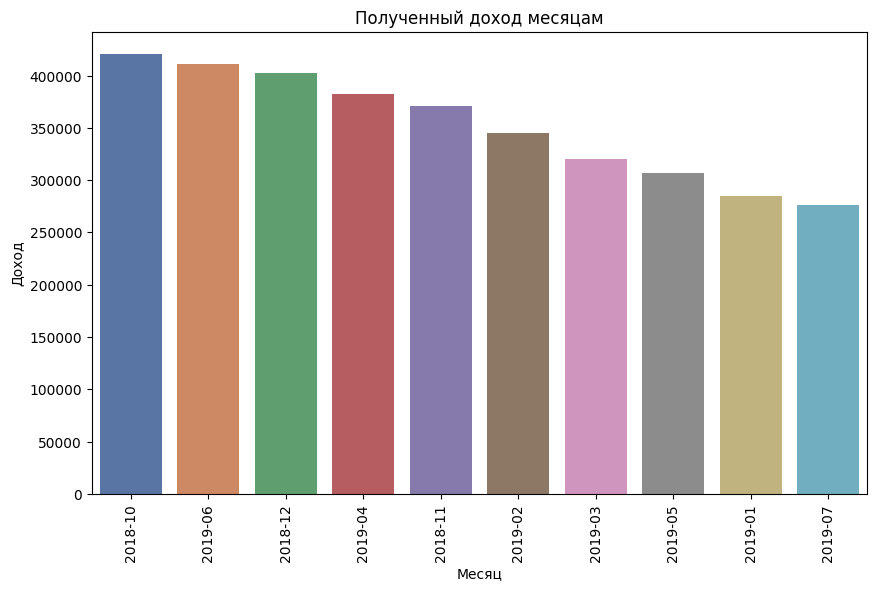

In [279]:
plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(x='month_year', y='total', data=total)
plt.xticks(rotation=90)
ax.set_title('Полученный доход месяцам') 
ax.set_xlabel('Месяц')
ax.set_ylabel('Доход') 
plt.show()

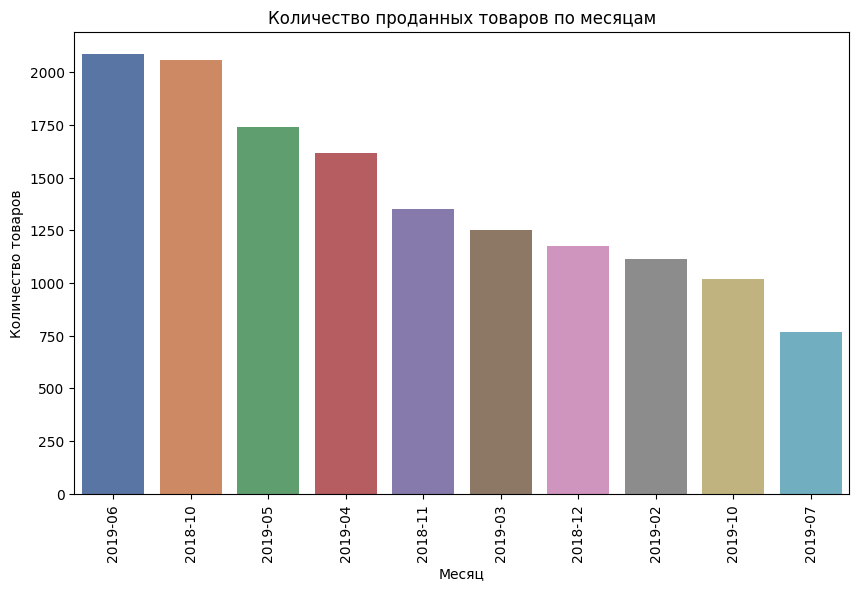

In [280]:
# построим график количества проданных товаров по месяцам
plt.figure(
    figsize=(10, 6)
)
sns.set_palette('deep')
ax = sns.barplot(x='month_year', y='quantity', data=quantity)
plt.xticks(rotation=90)
ax.set_title('Количество проданных товаров по месяцам') 
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество товаров') 
plt.show()

Посмотрим на зависимость среднего чека и частоты заказов.

In [281]:
mean_orders = (
    data.groupby(['customer_id'])
    .agg({'total':'mean', 'order_id':'nunique'})
    .rename(columns={'total':'mean_receipt',
           'order_id':'order_quantity'})
    .sort_values(by='mean_receipt', ascending=False)
    .reset_index()
)

display(mean_orders.head())

# проверим, зависит ли частота заказов от среднего чека
mean_orders.corr()

,customer_id,mean_receipt,order_quantity
0,146cd9bf-a95c-4afb-915b-5f6684b17444,49432.0,1
1,6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718.0,1
2,58a4c3cc-504f-43ea-a74a-bae19e665552,26616.0,2
3,1b2764ad-9151-4051-a46a-9b01b62e6335,24370.0,1
4,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,16536.0,1


,mean_receipt,order_quantity
mean_receipt,1.000000,0.001097
order_quantity,0.001097,1.000000


Зависимости среднего чека от количества заказов и наоборот практически нет.

Проверим, какое количество пользователей сделало больше одного заказа.

In [282]:
orders = (
    data.groupby(['customer_id'])
    .agg({'order_id':'nunique'})
    .sort_values(by='order_id', ascending=False)
)
orders.query('order_id > 1').sort_values(by='order_id', ascending=False).count()

order_id    160
dtype: int64

160 клиентов из 2450 сделали повторный заказ. Всего 6% от общего числа за исследуемый период. Имеет смысл обратить внимание на тех клиентов, которые не вернулись за повторной покупкой.

Посмотрим, много ли клиентов делали заказ на дорогие позиции. Определим лимит в 5000 у.е.

In [283]:
len(data.query('price >= 5000').groupby('customer_id'))

45

Меньше 2% клиентов покупали дорогие товары. Основная масса покупателей предпочитает недорогие позиции.

Проверим, есль ли в у магазина оптовые покупатели.

In [284]:
orders_quant = (
    data.groupby(['order_id'])
    .agg({'quantity':'sum'})
    .sort_values(by='quantity', ascending=False)
)

len(orders_quant.query('quantity > 50'))

39

## Вывод
- В товарных категориях по общей сумме покупок лидируют "Растения" и "Товары для дома", причем растений было куплено больше по количеству, а сумма покупок выше для товаров для дома. Однако средний чек выше для категорий "Инструменты" и "Хранение и перевозка"
- Чаще всего в самых популярных категориях "Растения" и "Товары для дома" покупали апреле 2019 и декабре 2018 года соответственно
- Абсолютный лидер по количеству покупателей, заказов и товарных единиц - день. С 12:00 по 18:00 было куплено больше всего товаров на самую большую сумму. Меньше всего - ночью
- Как по сумме покупок, так и по количеству купленных товаров лидируют октябрь 2018 года и июнь 2019 года
- Зависимости среднего чека от количества заказов и наоборот практически нет
- 160 клиентов из 2450 сделали повторный заказ. Всего 6% от общего числа за исследуемый период
- Меньше 2% клиентов покупали дорогие товары. Основная масса покупателей предпочитает недорогие позиции
- У магазина есть оптовые покупатели: в 39 заказах было больше 50 позиций.

## 3.2 Кластеризация
<a name="clusters"></a>
Попробуем разделить клиентов на сегменты с помощью кластеризации. 

Создадим dataframe с группировкой данных по каждому клиенту. 


In [285]:
cluster_data = (
    data.groupby('customer_id')
    .agg({'order_id':'nunique', 'product':'nunique', 'quantity':'sum', 'total':'sum', 'price':'sum', 'product_category':'nunique'}).reset_index()
)

cluster_data = cluster_data.drop(columns = 'customer_id')
cluster_data.head()

,order_id,product,quantity,total,price,product_category
0,1,4,4,555.0,555.0,1
1,1,1,1,442.0,442.0,1
2,1,1,2,914.0,457.0,1
3,1,1,1,1649.0,1649.0,1
4,1,1,2,2324.0,1162.0,1


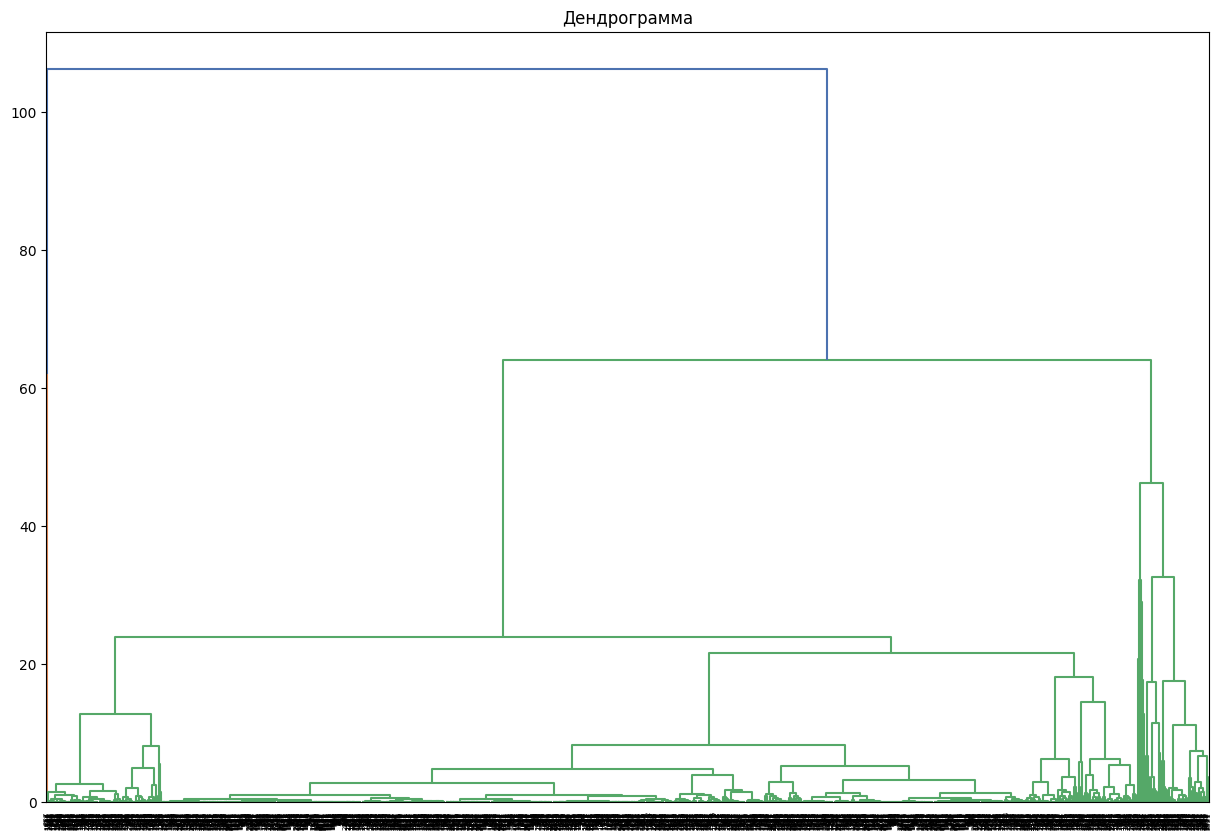

In [286]:
# создадим объект класса StandardScaler
scaler = StandardScaler()
# обязательная стандартизация данных перед работой с алгоритмами
X_sc = scaler.fit_transform(cluster_data)
# построим матрицу расстояний
linked = linkage(X_sc, method = 'ward')

# нарисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

Дендрограмма выделяет один кластер, однако на наш взгляд на графике объединено слишком много англомераций. Отметим порог расстояний, после которого мы перестаём объединять объекты на уровне 20 и визуально выделим четыре кластера.

In [287]:
# задаём модель k_means с числом кластеров 4 и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 3)
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
cluster_data['cluster_km'] = labels



Оценим результат работы алгоритма с помощью метрики силуэта.

In [288]:
silhouette_score(X_sc, labels)

0.8186721856033784

Оценка достаточно высокая и результат может быть принят.

In [289]:
# выводим статистику по средним значениям наших признаков по кластеру и по количеству позиций в каждом кластере
cluster_data.pivot_table(index = 'cluster_km', aggfunc = ['count', 'mean', 'sum'])

count                                                      mean  \
           order_id price product product_category quantity total    order_id   
cluster_km                                                                      
0              2316  2316    2316             2316     2316  2316    1.057858   
1                 1     1       1                1        1     1  126.000000   
2               130   130     130              130      130   130    1.561538   
3                 2     2       2                2        2     2   18.000000   

                                                                    \
                    price     product product_category    quantity   
cluster_km                                                           
0             1057.408895    1.448618         1.000000    4.544473   
1           134145.000000  130.000000         7.000000  344.000000   
2             2961.238462    9.176923         2.061538   28.261538   
3            71879.500000   28.000000         3.000000  654.500000   

                               sum                                      \
                    total order_id      price product product_category   
cluster_km                                                               
0             1396.972798     2450  2448959.0    3355             2316   
1           166988.000000      126   134145.0     130                7   
2             4601.061538      203   384961.0    1193              268   
3            87789.000000       36   143759.0      56                6   

                                
           quantity      total  
cluster_km                      
0             10525  3235389.0  
1               344   166988.0  
2              3674   598138.0  
3              1309   175578.0

Распределение для признака order_id


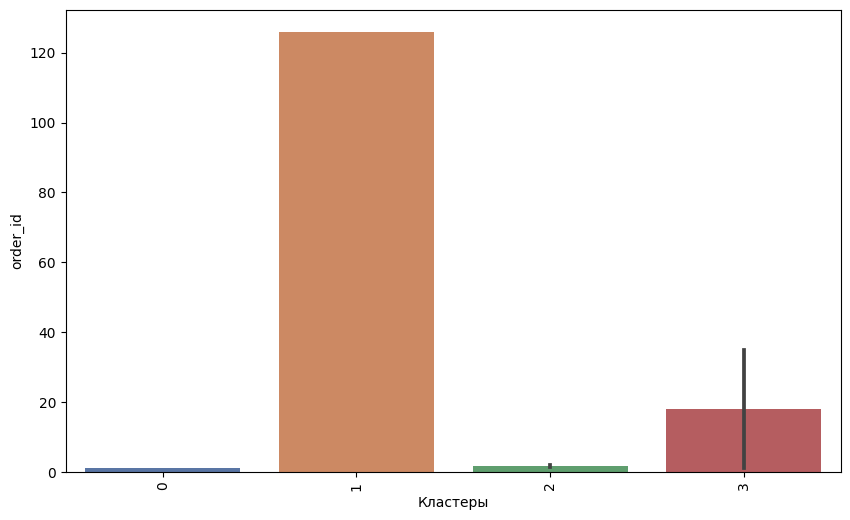

Распределение для признака product


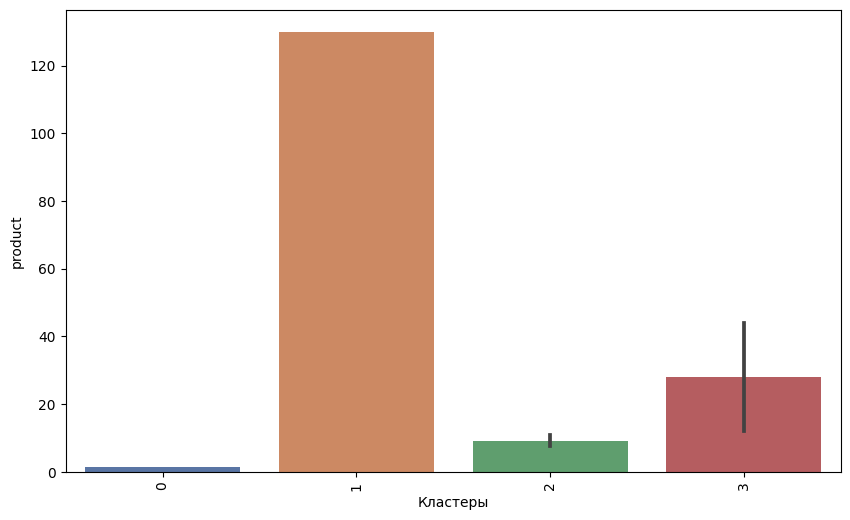

Распределение для признака quantity


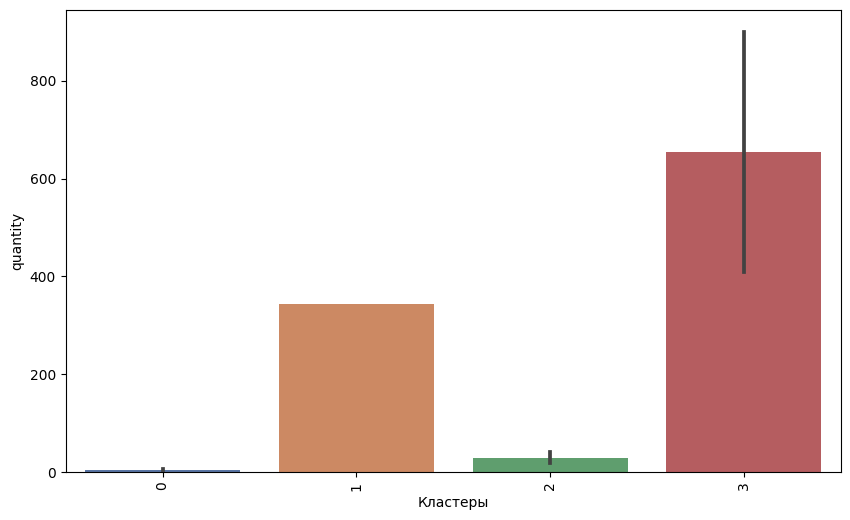

Распределение для признака total


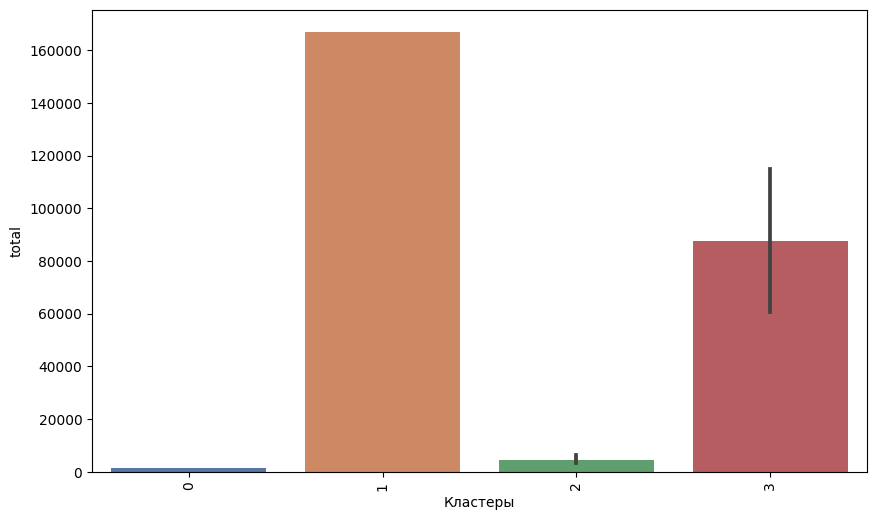

Распределение для признака price


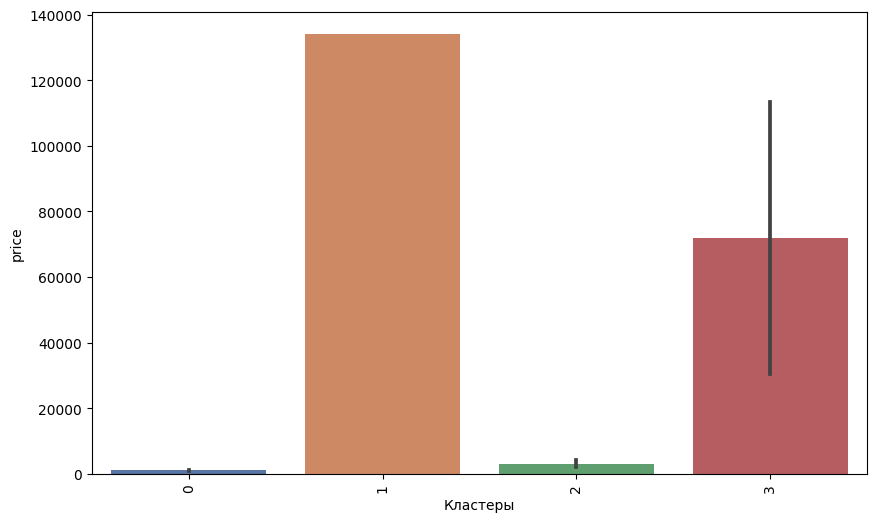

Распределение для признака product_category


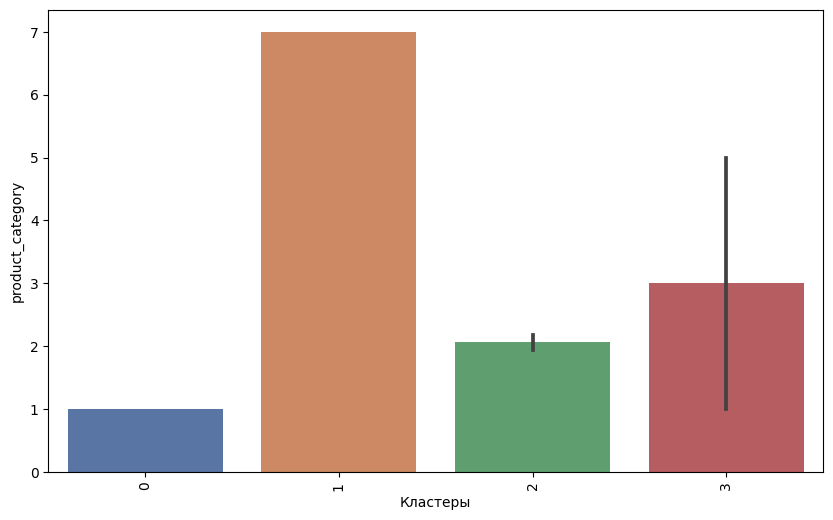

Распределение для признака cluster_km


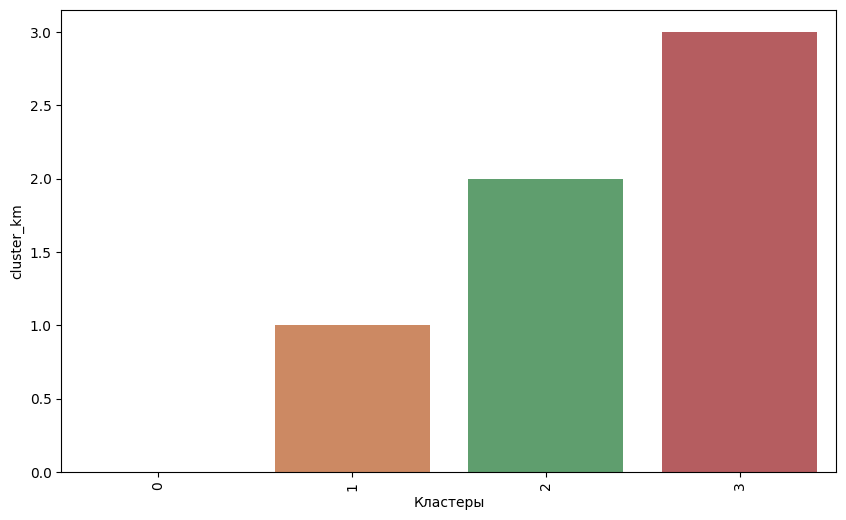

In [290]:
# построим графики распределения каждого признака
for col in cluster_data.columns:
    plt.figure(
    figsize=(10, 6)
)
    sns.set_palette('deep')
    ax = sns.barplot(data=cluster_data, y=col, x='cluster_km')
    plt.xticks(rotation=90)
    print('Распределение для признака', col) 
    ax.set_xlabel('Кластеры')
    ax.set_ylabel(col) 
    plt.show()



,cluster_km,total,quantity,percent_amount,percent_quantity
0,0,3235389.0,10525,0.774741,0.663954
1,2,598138.0,3674,0.143229,0.231769
2,3,175578.0,1309,0.042044,0.082576
3,1,166988.0,344,0.039987,0.021701


Распределение для признака cluster_km


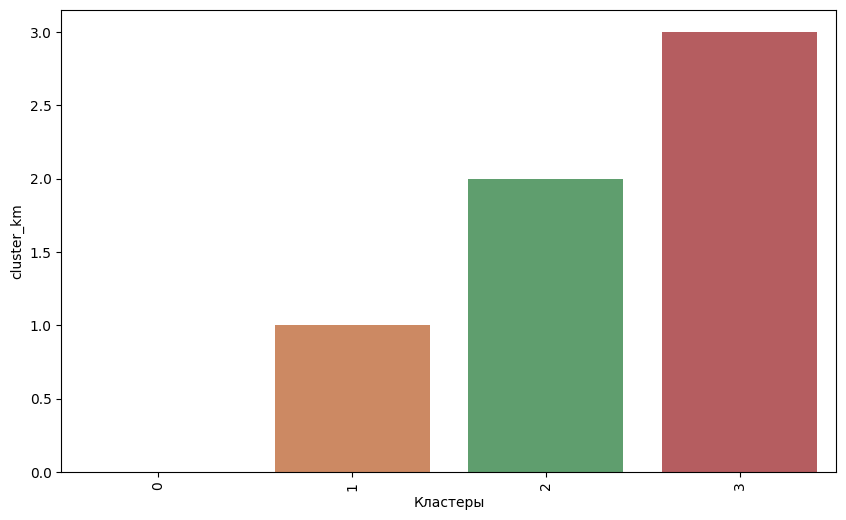

Распределение для признака total


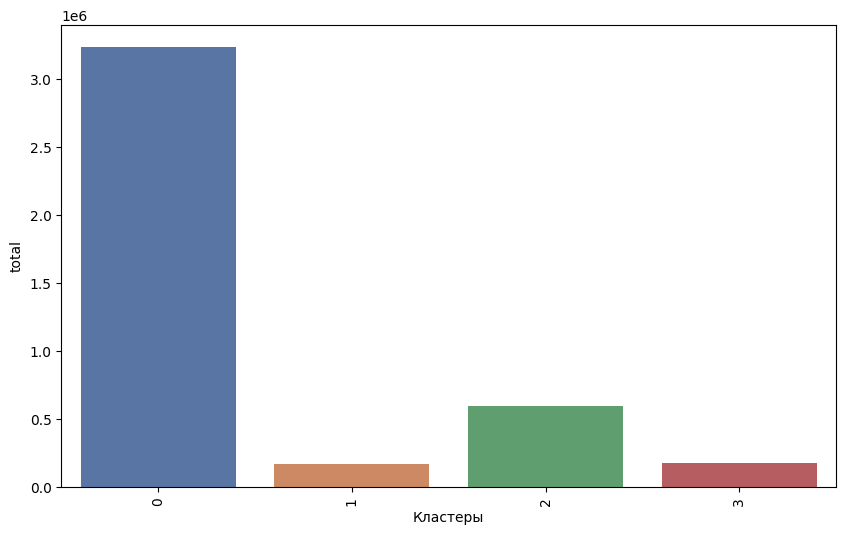

Распределение для признака quantity


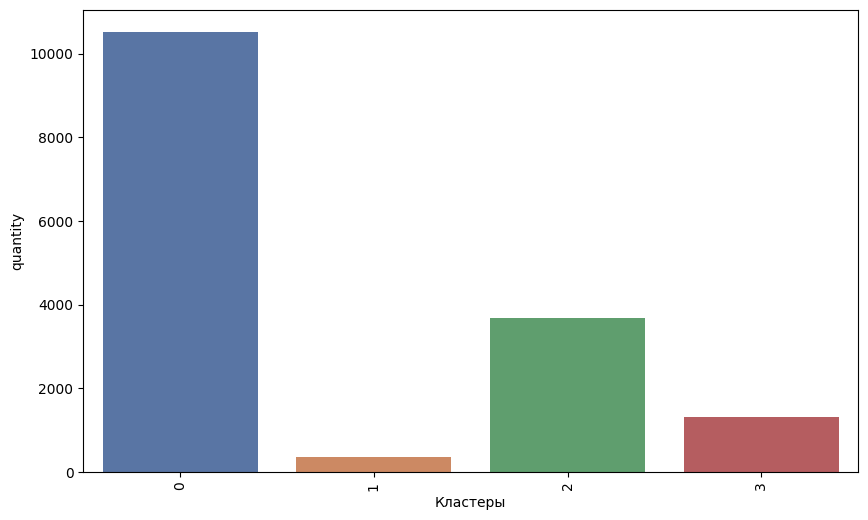

Распределение для признака percent_amount


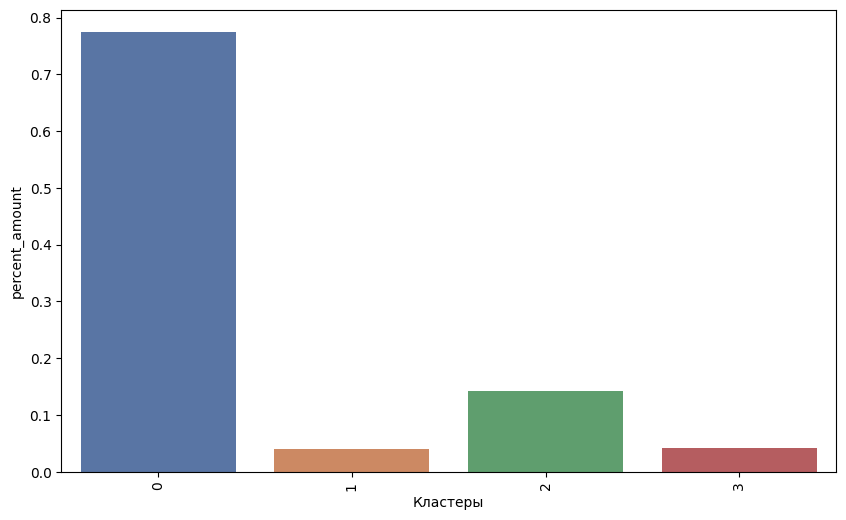

Распределение для признака percent_quantity


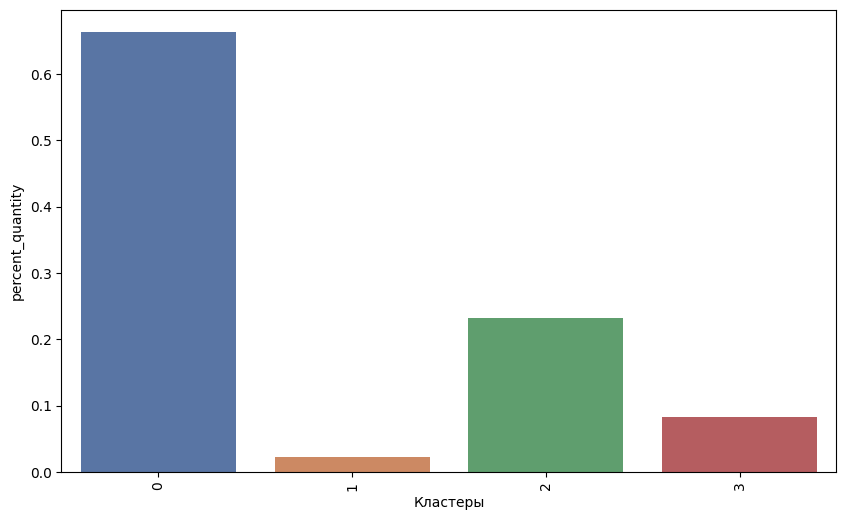

In [291]:
df = cluster_data.groupby('cluster_km').agg({'total':'sum', 'quantity':'sum'}).sort_values(by='total', ascending=False).reset_index()

total_amount = df['total'].sum()
total_quantity = df['quantity'].sum()
df['percent_amount'] = df['total']/total_amount
df['percent_quantity'] = df['quantity']/total_quantity
display(df)
for col in df.columns:
    plt.figure(
    figsize=(10, 6)
)
    sns.set_palette('deep')
    ax = sns.barplot(data=df, y=col, x='cluster_km')
    plt.xticks(rotation=90)
    print('Распределение для признака', col) 
    ax.set_xlabel('Кластеры')
    ax.set_ylabel(col) 
    plt.show()

## Вывод
Кластеризация позволяет нам сделать следующие выводы о четырех кластерах:
- алгоритм выделил один большой кластер (0), к которому отнес 95% пользователей, делающих в среднем 1 заказ в 1 категории на сумму в среднем 1417 у.е., в котором находится 4-5 позиций 1-2 товаров по цене около 1000 рублей
- кластер (3) из 0,003% покупателей, делающих в среднем 5-6 заказов на сумму в среднем 54 537 у.е., в которых находится 374 позиции  15-16 товаров по цене около 39 197 рублей в 2 категориях
- кластер (2) из 0,04% покупателей, сделавших 1-2 заказа на сумму в среднем 2951 у.е., в которых находится 14-15 позиций 8-9 товаров по цене около 2160 у.е. в 2 категориях
- кластер (1), состоящий из 1 покупателя, который сделал 126 заказов из 130 продуктов на максимальную сумму из dataframe 166 988 у.е. в 7 категориях.

# 4. Презентация
<a name="presentation"></a>

Ссылка на презентацию: https://disk.yandex.ru/i/bhr4EY39JuiLCw

Ссылка на дашборд: https://public.tableau.com/app/profile/ksenia6674/viz/_16645671362710/first#1

# 5. Общий вывод и рекомендации
<a name="sumup"></a>

Для интернет-магазина товаров для дома и быта «Пока все ещё тут» нам необходимо было проанализировать профили потребления покупателей для подготовки персональных предложений для клиентов, а также представить рекомендаций для менеджера на основании проведенного анализа.

В ходе исследования мы заменинили тип столбца с датой на datetime, добавили новые колонки для месяца, дня, времени, года и с общей суммой строки, а также проверили данные на аномалии и выбивающиеся значения. Затем мы провели исследовательский анализ данных и сформулировали **гипотезы**:

1. Клиенты, которые покупают много товарных позиций, и клиенты с высоким средним чеком, это одни и те же люди, и поощрять их нужно одинаковым способом.
2. 2784 заказа сделали 2450 покупателей, те много заказов сделало малое количество клиентов. Если таких клиентов отдельно выделить и поощрять, то количество заказов с их стороны увеличится.
3. Есть зависимость между средним чеком и наличием повторных заказов у покупателей. Увеличение среднего чека может привести к увеличению или уменьшению частоты заказов или наоборот.

После чего мы сегментировали покупателей на основе истории их покупок, выделили товарные категории и провели кластеризацию пользователей.
**Исследовательский анализ данных** позволяет нам сделать следующие выводы:
- В столбце дата представлены данные о 2784 заказах, сделанных 2451 покупателем за период с 00:00 1 октября 2018 года по 16:00 31 октября 2019 года. В таблице представлено 2343 уникальные товарные позиции
- В товарных категориях по общей сумме покупок лидируют "Растения" и "Товары для дома", причем растений было куплено больше по количеству, а сумма покупок выше для товаров для дома. Однако средний чек выше для категорий "Инструменты" и "Хранение и перевозка", то есть в этих категориях делали меньше заказов, но на большую сумму. Чаще всего в самых популярных категориях "Растения" и "Товары для дома" покупали апреле 2019 и декабре 2018 года соответственно
- Абсолютный лидер по количеству покупателей, заказов и товарных единиц - день. С 12:00 по 18:00 было куплено больше всего товаров на самую большую сумму. Меньше всего - ночью.
- Зависимости среднего чека от количества заказов и наоборот практически нет
- 160 клиентов из 2450 сделали повторный заказ. Всего 6% от общего числа за исследуемый период
- У магазина есть оптовые покупатели: в 39 заказах было больше 50 позиций
- Меньше 2% клиентов покупали дорогие товары. Основная масса покупателей предпочитает недорогие позиции.

Проведенная **кластеризация** позволяет сделать следующие выводы:
- алгоритм выделил один большой кластер (0), к которому отнес 95% пользователей, делающих в среднем 1 заказ в 1 категории на сумму в среднем 1417 у.е., в котором находится 4-5 позиций 1-2 товаров по цене около 1000 рублей
- кластер (3) из 0,003% покупателей, делающих в среднем 5-6 заказов на сумму в среднем 54 537 у.е., в которых находится 374 позиции  15-16 товаров по цене около 39 197 рублей в 2 категориях
- кластер (2) из 0,04% покупателей, сделавших 1-2 заказа на сумму в среднем 2951 у.е., в которых находится 14-15 позиций 8-9 товаров по цене около 2160 у.е. в 2 категориях
- кластер (1), состоящий из 1 покупателя, который сделал 126 заказов из 130 продуктов на максимальную сумму из dataframe 166 988 у.е. в 7 категориях.

Таким образом мы подтвердили гипотезу номер 2, гипотеза 1 верна в ряде случаев, а гипотеза 3 не подтвердилась.

На основании проведенного анализа мы можем дать следующие **рекомендации** менеджеру продукта, который отвечает за пользовательский опыт:
- Имеет смысл обратить внимание на тех клиентов, которые не вернулись за повторной покупкой (94% от общего числа клиентов за исследуемый период): делать рассылки с напоминаниями о магазине и товарах из списка категорий, в которых они делали покупки.
- Клиент, который сделал 126 заказов на максимальную сумму из dataframe 166 988 у.е. в течение полугода является самым лояльным к магазину, и, возможно, стоит обратить на него особое внимание и предоставить особые условия покупок (скидки, бонусы, промокоды).
- Большинство покупателей (отнесенных к первому кластеру) сделали лишь один заказ на один-два товара. Возможно, стоит предложить им похожие позиции в тех категориях, к которым относятся купленные ими товары.
- Также стоит обратить внимание на оптовых покупателей и рассмотреть возможность предоставления скидок в зависимости от объема покупок.
